In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [14]:
data = loadmat("E:\MLNEW _BTM\ex7data2.mat")

In [15]:
data

{'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.24399257],
        [ 1.01732013,  4.84473647],
        [ 2.17893568,  5.29758701],
        [ 2.85962615,  5.26041997],
        [ 1.30882588,  

In [16]:
X= data['X']


In [17]:
X.shape

(300, 2)

In [20]:
x1 = X[:,0:1]
x2 = X[:,1:1]



In [21]:
def find_closest_centroids(X,centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    for i in range (m):
        min_dist = 100000
        for j in range(k):
            dist = np.sum((X[i,:]- centroids[j,:])**2)
            if dist < min_dist:
               min_dist = dist
               idx[i] = j
    return idx                         

In [22]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])
initial_centroids.shape


(3, 2)

In [59]:
idx = find_closest_centroids(X,initial_centroids)
idx[0:3]

array([ 0.,  2.,  1.])

In [24]:
idx

array([ 0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [25]:
def compute_centroid(X,idx,k):
    m,n = X.shape
    centroid = np.zeros((k,n))
    for i in range(k):
        indices = np.where(idx==i)
        centroid[i,:] = (np.sum(X[indices,:],axis =1)/len(indices[0])).ravel()
    return centroid    

In [60]:
compute_centroid(X,idx,3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [28]:
compute_centroid.shape[0]

AttributeError: 'function' object has no attribute 'shape'

In [101]:
def k_means(X,centroids,max_iters):
    for i in range (max_iters):
        idx= find_closest_centroids(X,centroids)
        centroids =compute_centroid(X,idx,6)
    return idx,centroids   

In [62]:
idx,centroids = k_means(X,initial_centroids,10)

In [63]:
centroids

array([[ 1.95399466,  5.02557006],
       [ 3.04367119,  1.01541041],
       [ 6.03366736,  3.00052511]])

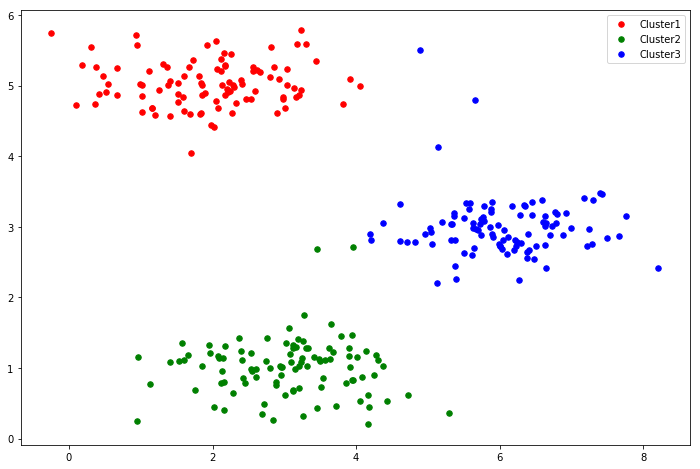

In [70]:
cluster1 = X[np.where(idx==0)[0],:]
cluster2  =X[np.where(idx==1)[0],:]
cluster3 = X[np.where(idx==2)[0],:]

fig,ax= plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r', label='Cluster1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='g', label='Cluster2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b', label='Cluster3')
ax.legend()


In [78]:
def init_centroid(X,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    idx = np.random.randint(0,m,k)
    
    for i in range(k):
        centroids[i,:]= X[idx[i],:]
        
    return centroids    

In [98]:
new_cen = init_centroid(X,6)

In [99]:
new_cen

array([[ 2.04974595,  5.6241395 ],
       [ 2.90401653,  4.61220411],
       [ 5.69797866,  2.94977132],
       [ 2.4051802 ,  1.11778123],
       [ 6.88575584,  2.88845269],
       [ 3.24024211,  1.14876237]])

In [90]:
idx,centroids = k_means(X,new_cen,1000)

In [102]:
idx,centroids = k_means(X,new_cen,50)
centroids

array([[ 1.15931046,  4.9814591 ],
       [ 2.67056574,  5.07123915],
       [ 5.4273087 ,  2.98890448],
       [ 2.13526826,  0.95207674],
       [ 6.72534015,  2.95359156],
       [ 3.57702608,  1.02655071]])

In [91]:
centroids

array([[ 3.59982283,  1.03465594],
       [ 5.41750388,  3.03468272],
       [ 2.17259112,  0.94343997],
       [ 6.72534015,  2.95359156],
       [ 1.95399466,  5.02557006]])

C:\Users\ashish umrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([[ 1.95399466,  5.02557006],
       [ 3.04367119,  1.01541041],
       [ 6.03366736,  3.00052511]])

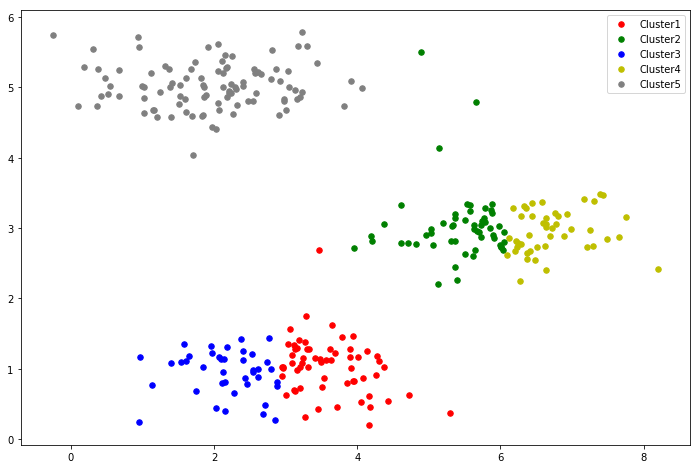

In [96]:
cluster1 = X[np.where(idx==0)[0],:]
cluster2  =X[np.where(idx==1)[0],:]
cluster3 = X[np.where(idx==2)[0],:]
cluster4 = X[np.where(idx==3)[0],:]
cluster5 = X[np.where(idx==4)[0],:]

fig,ax= plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0],cluster1[:,1],s=30,color='r', label='Cluster1')
ax.scatter(cluster2[:,0],cluster2[:,1],s=30,color='g', label='Cluster2')
ax.scatter(cluster3[:,0],cluster3[:,1],s=30,color='b', label='Cluster3')
ax.scatter(cluster4[:,0],cluster4[:,1],s=30,color='y', label='Cluster4')
ax.scatter(cluster5[:,0],cluster5[:,1],s=30,color='grey', label='Cluster5')
ax.legend()